## О задании
В этом задании вы будете предсказывать число на изображении. Изображения размера 28х28 развёрнуты в вектор размера 784. На изображениях присутствует одна цифра от 0 до 9 (включительно).

Работать мы будем с датасетом MNIST

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/wquiTtEKH4GY6EVQ9). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Настройки графиков
style.use('seaborn-v0_8-poster')
style.use('ggplot')

Загрузим данные. 

*В Google Colab данный датасет присутствует по умолчанию в папке `sample_data`. Если выполняете задание не в Google Colab, то можете скачать данные [отсюда](https://drive.google.com/file/d/1CHSJtvbmjPIvaQy9DIKQLhu-BnO3mO6H/view?usp=share_link)

In [2]:
df = pd.read_csv('./resources/mnist_train_small.csv', header=None)

In [3]:
df.shape

(20000, 785)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Каждая строка соответствует одному изображению. В первом столбце указана целевая переменная (число от 0 до 9), а в остальных - значения 784 пикселей изображения 28х28. Запишем признаки, по которым предсказываем в переменную `X`, а целевую переменную - в `y`

In [5]:
X = df.iloc[:, 1:].values
y = df[0].values

**Вопрос.** Какая задача машинного обучения решается?

<u>**Ответ**</u>: классификация 

Посмотрим на данные

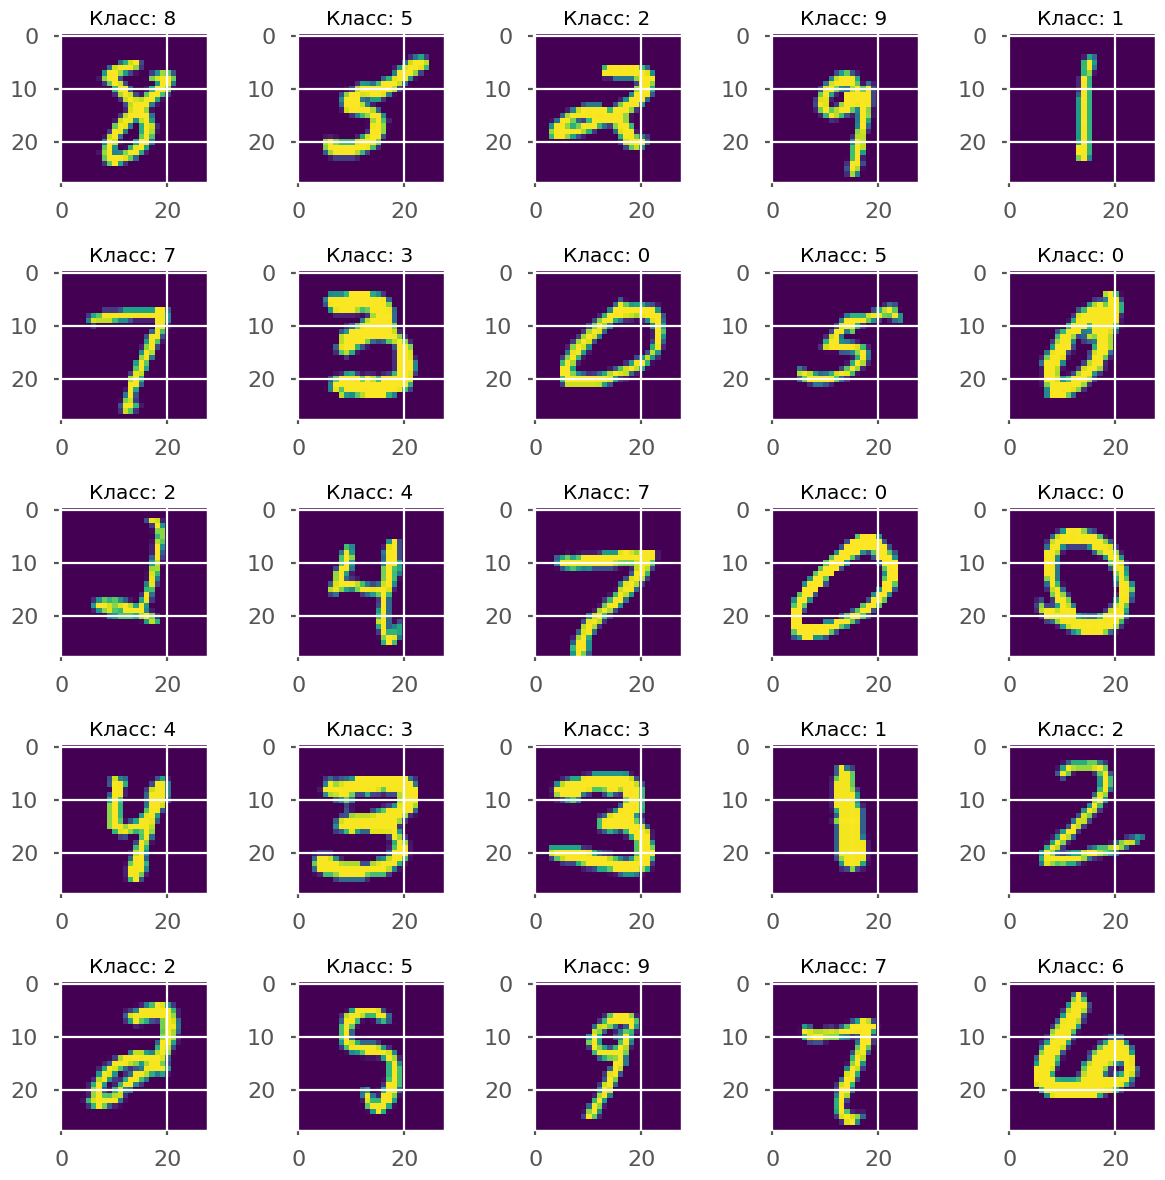

In [6]:
indices = np.random.randint(0, len(X), 25)
fig, axs = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout()
axs = axs.ravel()

for i, idx in enumerate(indices):
    img = X[idx].reshape(28, 28) # делаем reshape вектора, чтобы получить 28х28 изображение
    axs[i].imshow(img)
    axs[i].set_title(f'Класс: {y[idx]}')

## Разбиение данных

Разбейте данные на тренировочные и тестовые

*Не забудьте при разбиении сохранить соотношение классов в тренировочной и тестовой выброках

Посмотрим на распределение целевой выборки

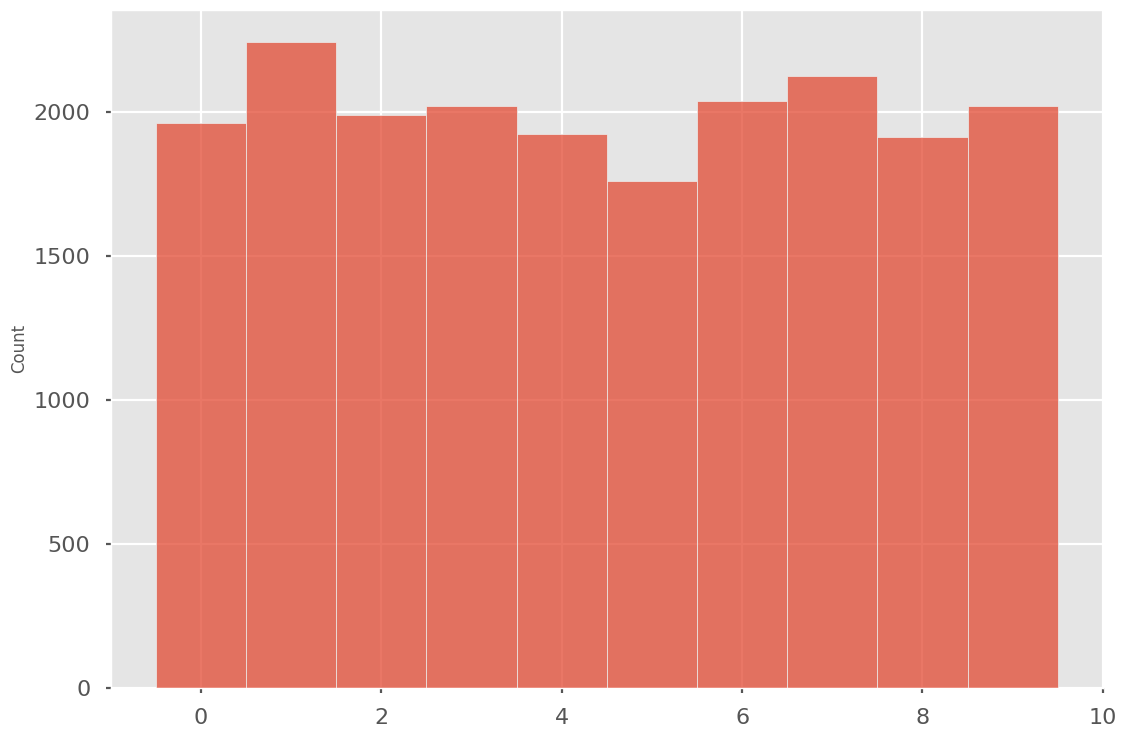

In [7]:
sns.histplot(data=y, discrete=True);

In [8]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1337)

Посмотрим на распределение обучающей и тестовой выборки

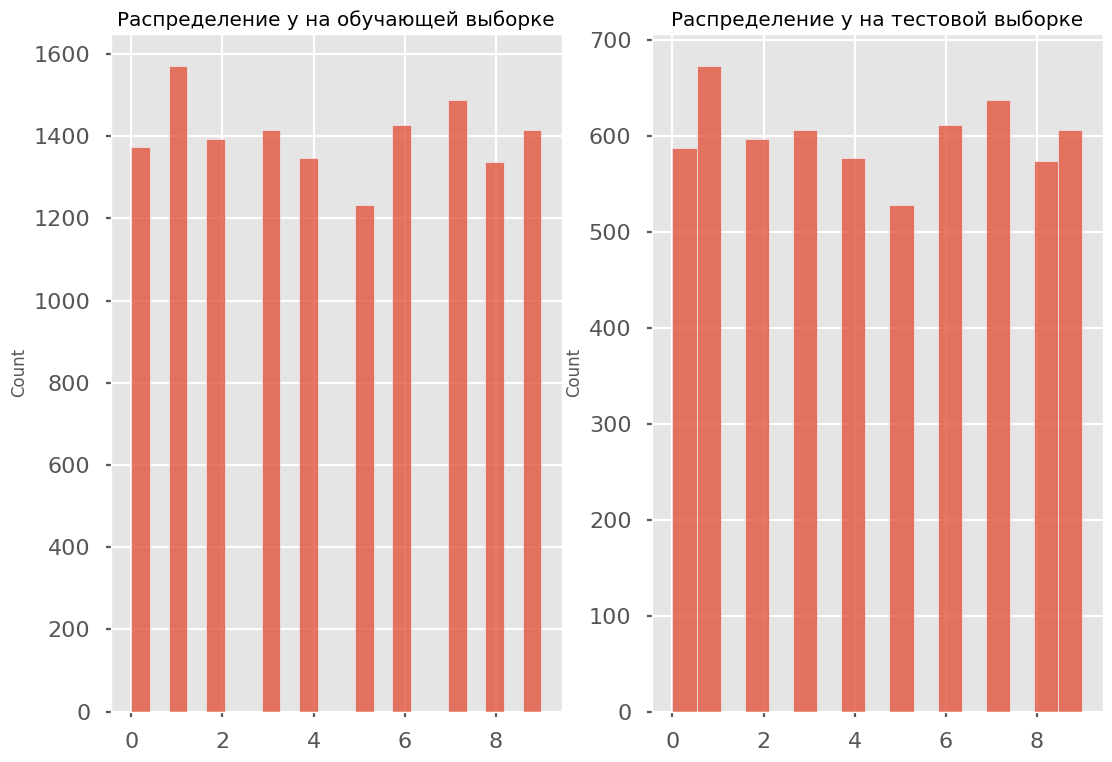

In [9]:
fig, ax =plt.subplots(1,2)
sns.histplot(y_train, ax=ax[0]).set_title('Распределение y на обучающей выборке')
sns.histplot(y_test, ax=ax[1]).set_title('Распределение y на тестовой выборке')
fig;

## Моделирование

Выберите 3 любых пройденных алгоритма машинного обучения и обучите их. Не забудьте подобрать лучшие гиперпараметры, если они есть. Качество моделей оценивайте по метрике `accuracy`

### KNN

In [10]:
knn_params = {
    'n_neighbors': np.arange(1,5),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='accuracy', n_jobs=-1)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4]), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [11]:
display(knn_gs.best_params_)
display(knn_gs.best_score_)

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

0.9554285714285713

In [12]:
knn_test_preds = knn_gs.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
print(f'Точность KNN на тестовой выборке: {knn_test_accuracy}')

Точность KNN на тестовой выборке: 0.9626666666666667


### Random forrest

In [13]:
rf_params = {'n_estimators': np.arange(10, 201, 50),
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 2, 3, 4, 5, 10],
            'min_samples_leaf': [1, 3, 5]}

rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', n_jobs=-1)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': array([ 10,  60, 110, 160])},
             scoring='accuracy')

In [14]:
display(rf_gs.best_params_)
display(rf_gs.best_score_)

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 110}

0.9517857142857142

In [15]:
rf_test_preds = rf_gs.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
print(f'Точность RF на тестовой выборке: {rf_test_accuracy}')

Точность RF на тестовой выборке: 0.953


### SVC

In [16]:
svc_params = {'kernel': ['linear', 'poly', 'rbf'],
              'gamma': ['scale', 'auto'],
              'class_weight': ['balanced', None]}

svс_gs = GridSearchCV(SVC(), svc_params, scoring='accuracy', n_jobs=-1)
svс_gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [17]:
display(svс_gs.best_params_)
display(svс_gs.best_score_)

{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

0.9633571428571429

In [18]:
svc_test_preds = svс_gs.predict(X_test)
svc_test_accuracy = accuracy_score(y_test, svc_test_preds)
print(f'Точность SVC на тестовой выборке: {svc_test_accuracy}')

Точность SVC на тестовой выборке: 0.9651666666666666


### Посмотрим на стандартное отклонение метрики
Будем смотреть на обучающей выборке по результатам, это даст нам некоторое представление о распределении ф-ции ошибки.

Сможем посмотреть насколько отличаются прогнозы между разными моделями.

In [19]:
train_score_stds = {}
for gs_model, model_name in zip([knn_gs, rf_gs, svс_gs], ['knn', 'rf', 'svc']):
    cv_results = pd.DataFrame(gs_model.cv_results_)
    train_score_stds[model_name] = cv_results[cv_results.rank_test_score==1].std_test_score.values[0]
train_score_stds

{'knn': 0.0021829581128480213,
 'rf': 0.002106840171964688,
 'svc': 0.0022655359324505304}

Видим, что стандартная ошибка accuracy при кросс валидации примерно 0.002.

Обратим внимание, что хоть и величина метрики в абсолютном значении больше у SVC ($0.965 > 0.962$),

разница между ними немного больше 1-го стандартного отклонения.

**(*) Дополнительно.** Провизуализируйте предсказания модели, используя код выше: случайным образом выберите 25 объектов из тестового множества и отобразите их реальные метки класса, а также предсказания модели

In [20]:
model_comparasions_df = pd.DataFrame({'y_test': y_test, 'knn_preds': knn_test_preds, 'rf_preds': rf_test_preds, 'svc_preds': svc_test_preds})
model_comparasions_df

,y_test,knn_preds,rf_preds,svc_preds
0,5,5,5,5
1,2,2,2,2
2,5,5,5,5
3,4,4,4,4
4,0,0,0,0
...,...,...,...,...
5995,0,0,0,0
5996,5,5,5,5
5997,9,9,9,9
5998,6,6,6,6


In [21]:
random_pred_sample = model_comparasions_df.sample(25)
random_pred_sample

,y_test,knn_preds,rf_preds,svc_preds
707,5,5,5,5
4328,3,3,3,3
4498,7,7,7,7
3475,8,8,8,8
1442,1,1,1,1
2785,7,7,7,7
3844,9,9,9,9
1945,3,3,3,3
2648,4,4,4,4
999,2,2,2,2


## Выводы

**Вопрос.** Напишите выводы о проделанной работе: какие модели выбраны; какие гиперпараметры перебирались и какие значения гиперпараметров оказались лучшими; какая модель оказалась лучшей?

<u>**Ответ**</u>: в качестве моделей были выбраны: KNN, radom forrest и SVC

Для KNN перебирались: количество ближайших соседей, параметр метрики Минковски, ф-ция весов

Лучшие параметры: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

Для RF перебирались: количество деревьев, критерий качества разбиения, максимальная глубина дерева, минимальное количество листьев для образования "ветки"

Лучшие параметры: {'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 110}

Для SVC перебирались: ядро, коэффициент ядра, использовать ли веса классов

Лучшие параметры: {'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

Лучший результат на тестовой выборке получился у SVC.

